In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\Python Customer Segmentation & Clustering Project\Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis






In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


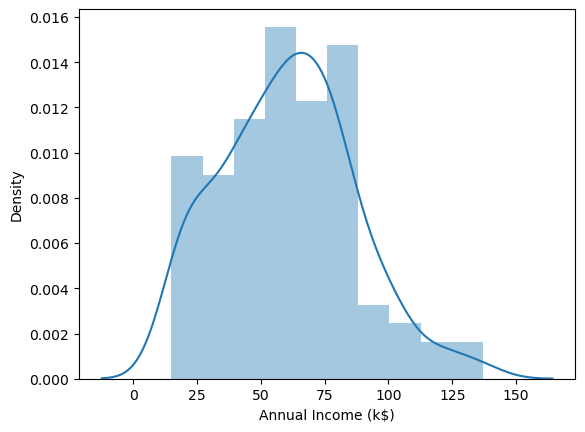

In [4]:
sns.distplot(df['Annual Income (k$)']);

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

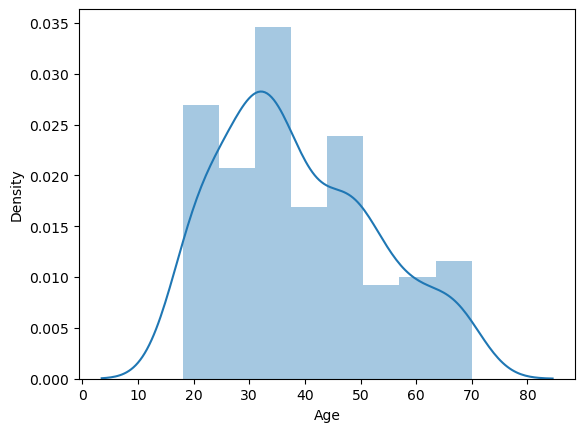

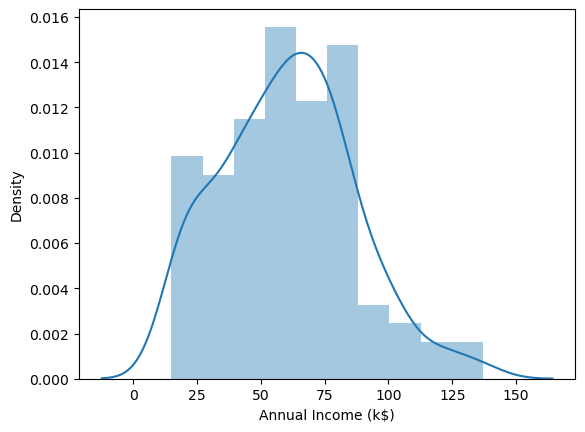

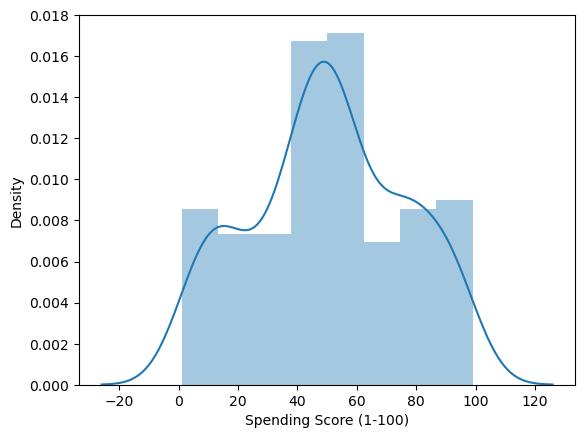

In [6]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns: 
        plt.figure()
        sns.distplot(df[i])

<Axes: xlabel='value', ylabel='Density'>

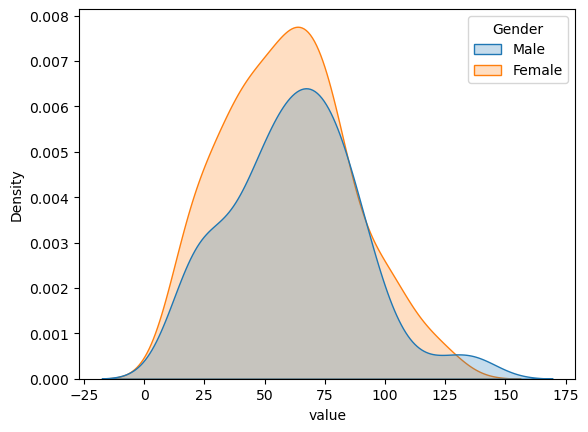

In [7]:
melted_df = df.melt(id_vars='Gender', value_vars=['Annual Income (k$)'])
sns.kdeplot(data=melted_df, x='value', hue='Gender', shade=True)

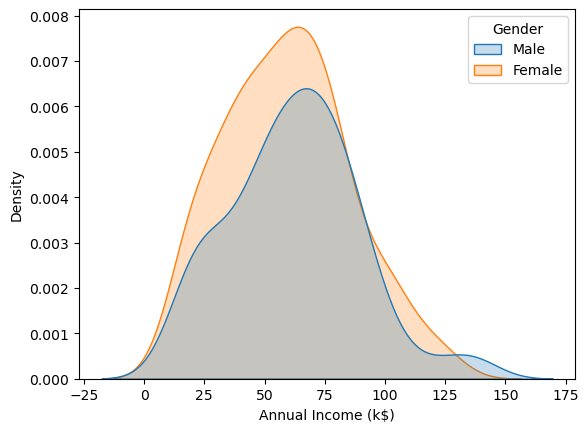

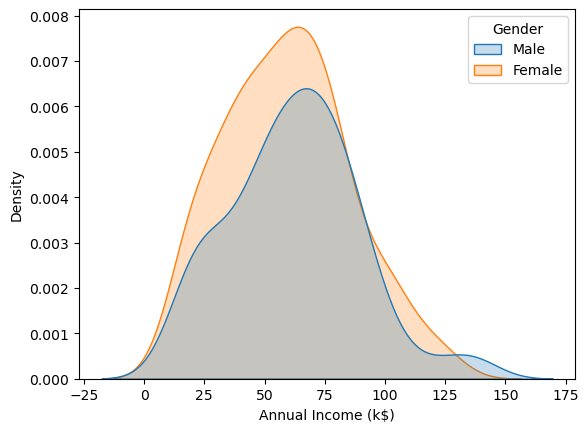

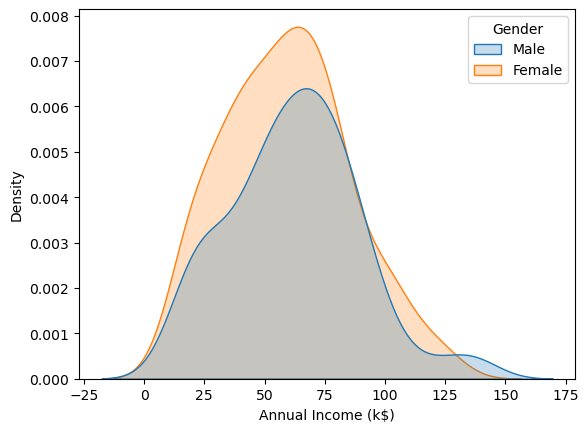

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

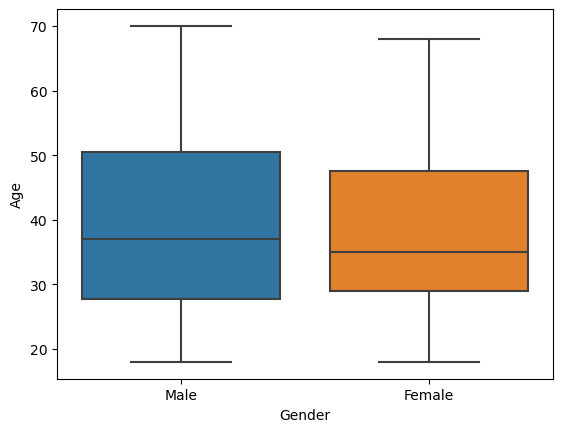

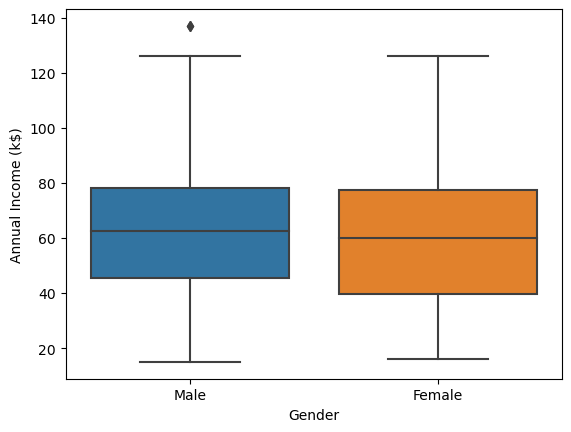

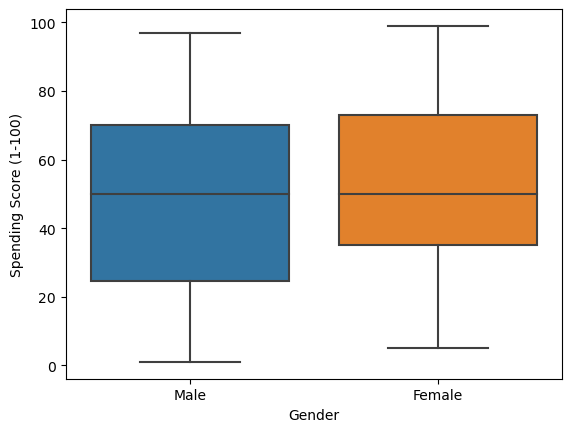

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [10]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

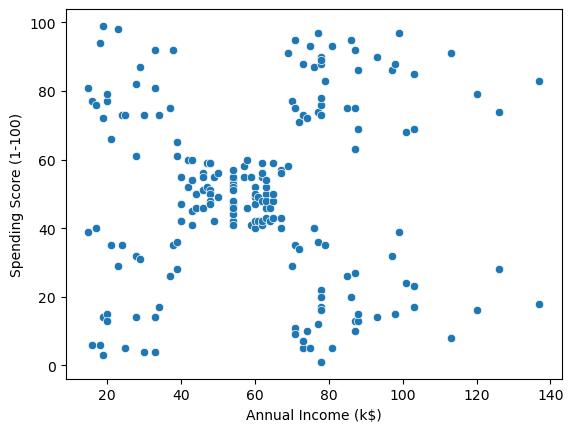

In [11]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)' );

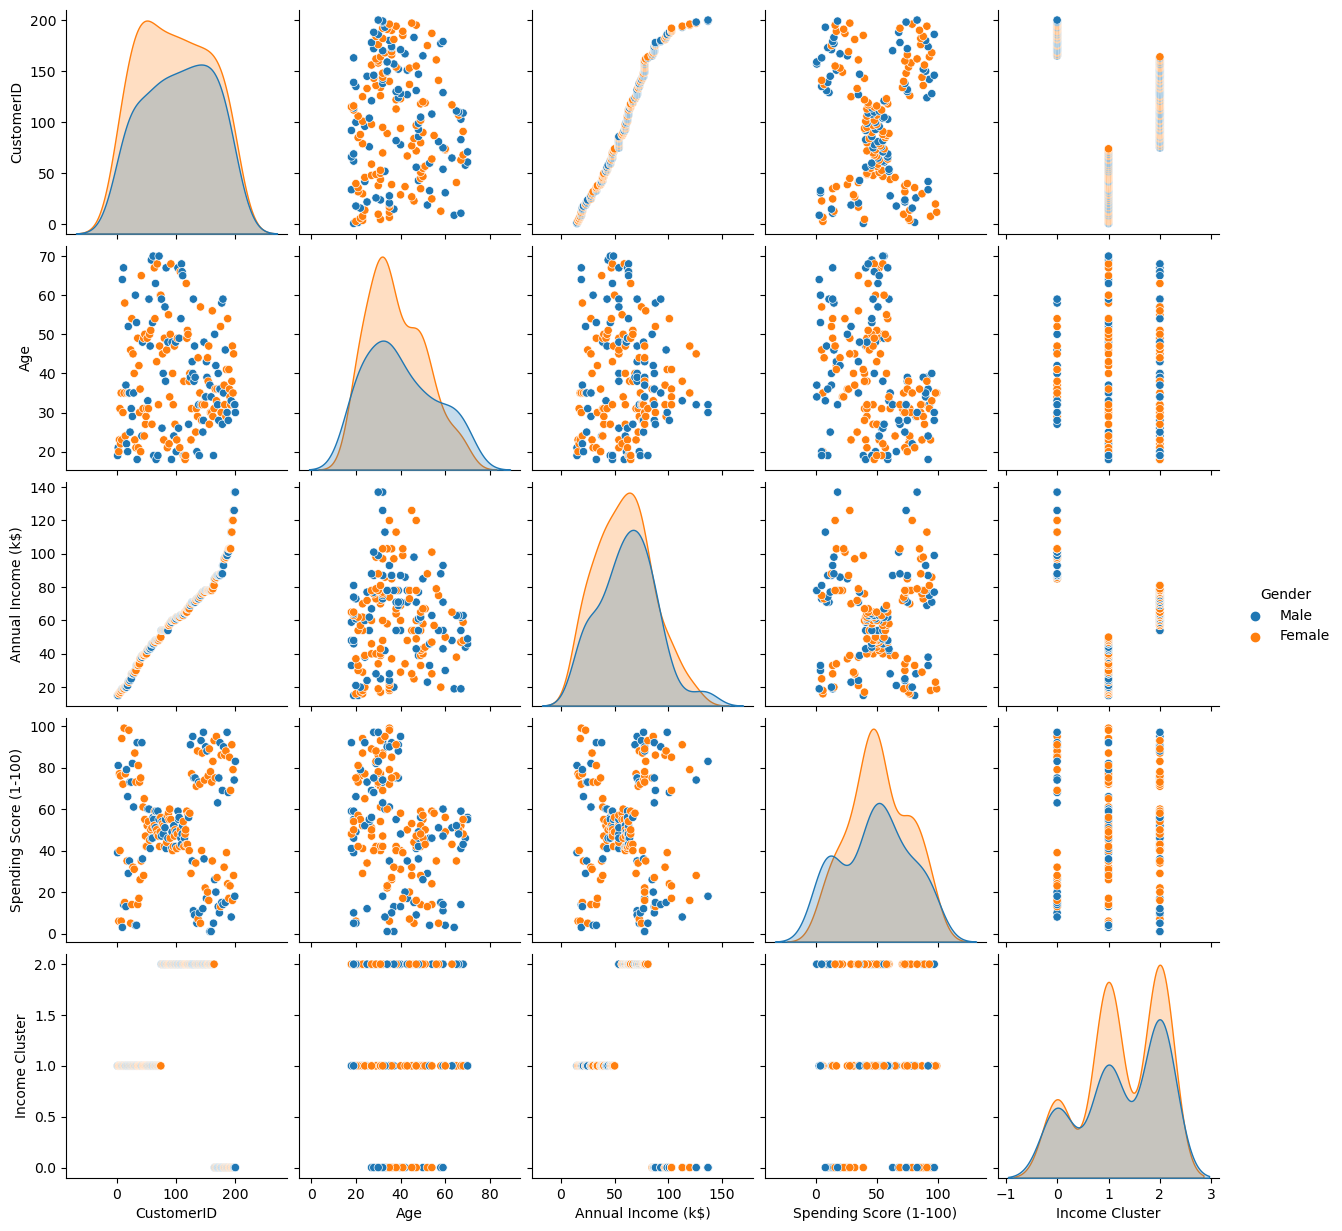

In [31]:
# df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender');

In [13]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()







,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


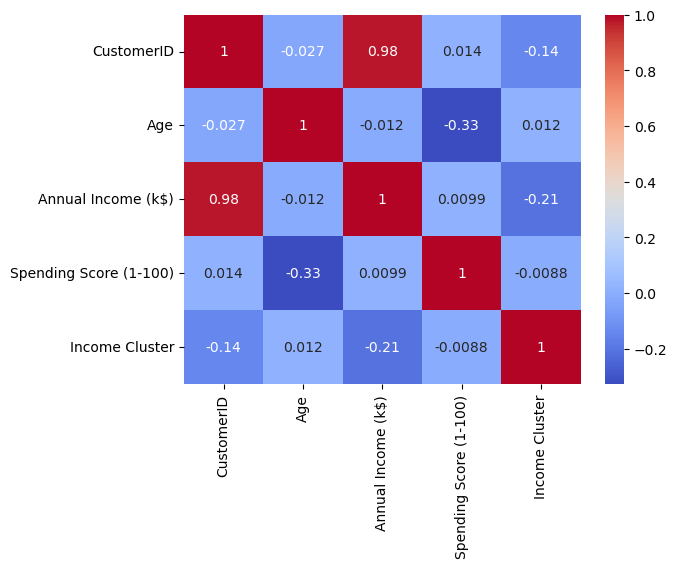

In [30]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

# Clustering - Univariate, Bivariate, Multivariate

# Univariate Clustering

In [37]:
clustering1 = KMeans(n_clusters=3)

In [38]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [39]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [40]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4


In [41]:
df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [42]:
clustering1.inertia_

23517.33093093093

In [43]:
inertia_scores = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)


In [44]:
inertia_scores

[137277.28,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8481.49619047619,
 5050.904761904762,
 3941.416361416361,
 2822.4996947496948,
 2340.1865384615385,
 1743.477272727273]

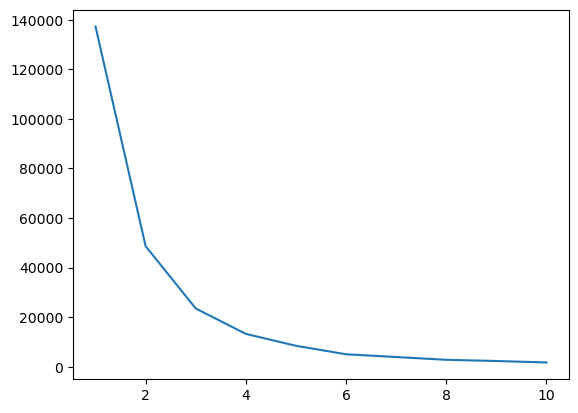

In [45]:
plt.plot(range(1, 11), inertia_scores);

In [46]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [47]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [63]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


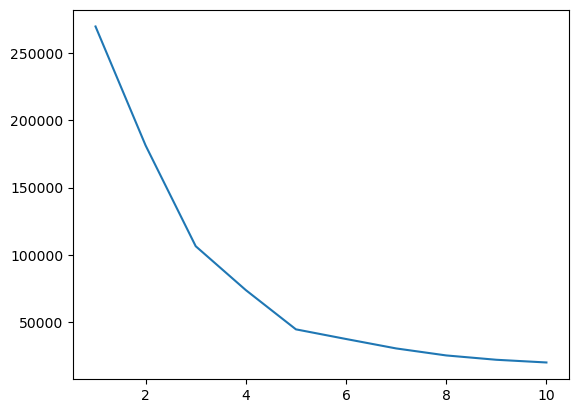

In [64]:
inertia_scores2 = []
for i in range (1, 11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1, 11), inertia_scores2);

In [69]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

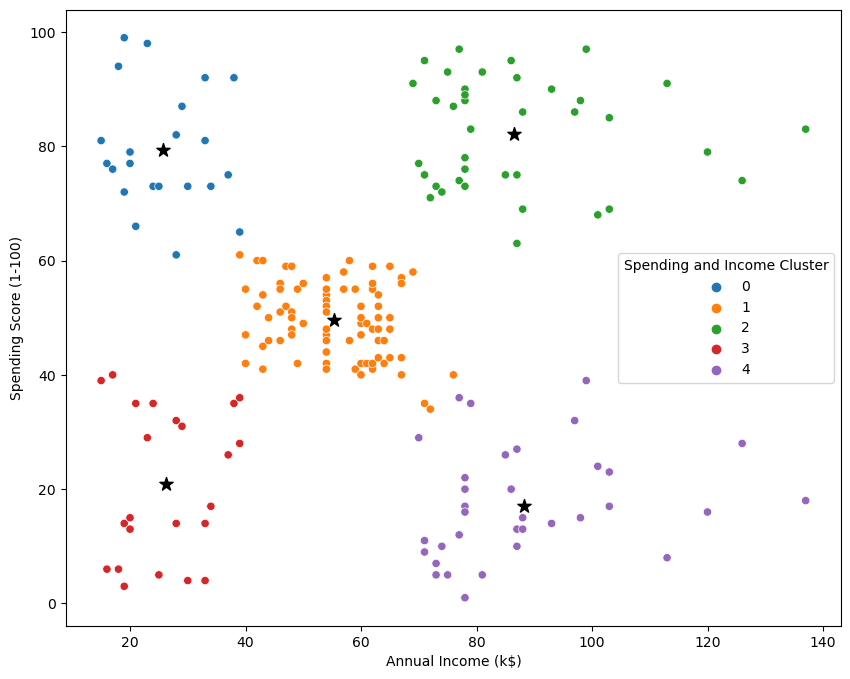

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')
plt.savefig('clustering_bivariate.png')

In [72]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


In [73]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


# Multivariate Clustering

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scale = StandardScaler()

In [76]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


In [78]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,1
1,2,21,15,81,0,0,1
2,3,20,16,6,0,3,0
3,4,23,16,77,0,0,0
4,5,31,17,40,0,3,0


In [79]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [81]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [84]:
dff = scale.fit_transform(dff)


In [85]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


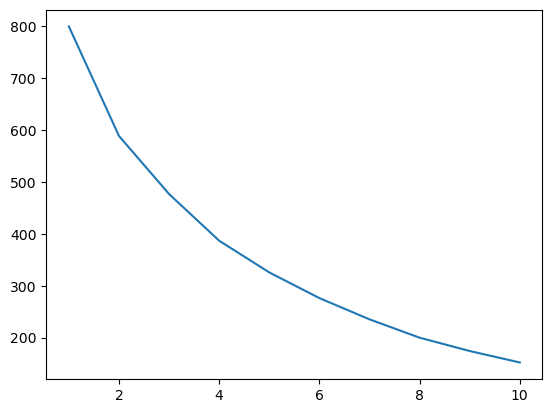

In [86]:
inertia_scores3 = []
for i in range (1, 11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1, 11), inertia_scores3);

In [87]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,4


In [89]:
df.to_csv('Clustering.csv')